In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train=X_train
X_test=X_test

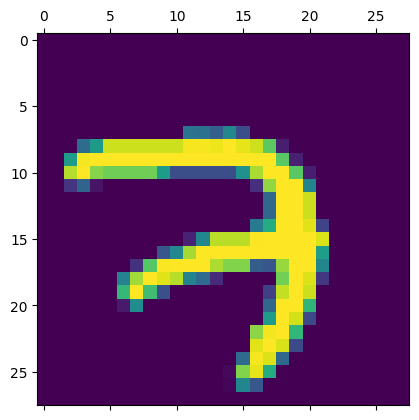

In [ ]:
plt.matshow(X_train[5000])

In [ ]:
y_train[2]

np.uint8(4)

In [ ]:
X_trained_flatten=X_train.reshape(len(X_train),28*28)
X_test_flatten=X_test.reshape(len(X_test),28*28)


In [ ]:
X_trained_flatten.shape

(60000, 784)

In [ ]:
X_test_flatten.shape

(10000, 784)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(X_trained_flatten,y_train,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8080 - loss: 0.7310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9133 - loss: 0.3115
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9200 - loss: 0.2804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.2674


In [ ]:
model.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9153 - loss: 0.3055


[0.2697087526321411, 0.9259999990463257]

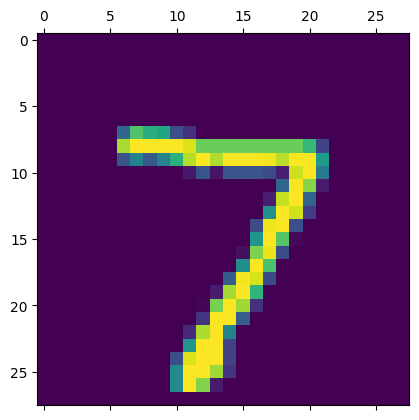

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test_flatten)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([1.4449671e-02, 2.7806615e-07, 2.3152204e-02, 9.4810081e-01,
       2.1066125e-03, 8.5332870e-02, 1.0230582e-06, 9.9978399e-01,
       5.2665897e-02, 5.4097772e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

np.int64(7)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    1,    0,    4,    8,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   7,    9,  901,   25,   12,    4,   13,   13,   44,    4],
       [   1,    0,   13,  936,    1,   17,    1,   13,   21,    7],
       [   1,    1,    2,    1,  918,    0,   11,    5,   10,   33],
       [   9,    2,    1,   43,   10,  767,   14,    8,   31,    7],
       [   7,    3,    5,    1,    8,   10,  919,    2,    3,    0],
       [   1,    6,   19,    8,    7,    0,    0,  962,    2,   23],
       [   7,    7,    5,   26,    9,   20,    8,   13,  869,   10],
       [  11,    7,    1,   10,   27,    6,    0,   28,    4,  915]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

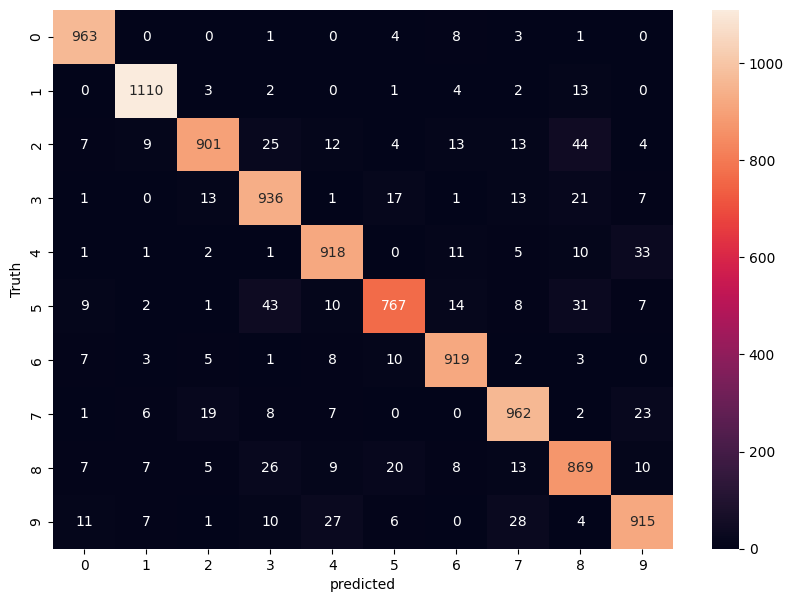

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')